<a href="https://colab.research.google.com/github/jinmedi/MT_project/blob/main/MP_project240728_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


내시경 이미지 부분만 크롭

In [ ]:
import cv2
import numpy as np
import os

def detect_and_crop_color_image(image_path, padding=10):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define range for high saturation colors
    lower_sat = np.array([0, 50, 50])
    upper_sat = np.array([179, 255, 255])

    # Threshold the HSV image to get only high saturation colors
    mask = cv2.inRange(hsv, lower_sat, upper_sat)

    # Perform morphological operations to remove noise
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print(f"Warning: No color regions found in {image_path}")
        return None

    # Find the largest contour (which should be our color image)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Add padding
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(img.shape[1] - x, w + 2*padding)
    h = min(img.shape[0] - y, h + 2*padding)

    # Crop the image
    cropped = img[y:y+h, x:x+w]

    return cropped

def crop_images_in_folder(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        if os.path.isfile(img_path):
            cropped_image = detect_and_crop_color_image(img_path)
            if cropped_image is not None:
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, cropped_image)
                print(f"Processed and saved: {filename}")
            else:
                print(f"Failed to process: {filename}")

# Example usage:
input_folder = '/content/drive/MyDrive/Colab Notebooks/MT_project/MT_0'
output_folder = '/content/drive/MyDrive/Colab Notebooks/MT_project/MT_0_crop'
crop_images_in_folder(input_folder, output_folder)

Processed and saved: c0_22_81bddd1d.jpg
Processed and saved: c0_2_0d1ebf6c.jpg
Processed and saved: c0_2_b9bd9ee4.jpg
Processed and saved: c0_25_81bddd1d.jpg
Processed and saved: c0_11_81bddd1d.jpg
Processed and saved: c0_2_c318f4f9.jpg
Processed and saved: c0_18_81bddd1d.jpg
Processed and saved: c0_2_487cae5b.jpg
Processed and saved: c0_16_81bddd1d.jpg
Processed and saved: c0_13_81bddd1d.jpg
Processed and saved: c0_17_81bddd1d.jpg
Processed and saved: c0_2_3644aa4c.jpg
Processed and saved: c0_32_81bddd1d.jpg
Processed and saved: c0_33_81bddd1d.jpg
Processed and saved: c0_2_7317a4b5.jpg
Processed and saved: c0_2_8bc95ee5.jpg
Processed and saved: c0_2_f7db44d2.jpg
Processed and saved: c0_27_81bddd1d.jpg
Processed and saved: c0_30_81bddd1d.jpg
Processed and saved: c0_31_81bddd1d.jpg


'/content/drive/MyDrive/Colab Notebooks/MT_project/MT_0_crop에 class '0'에 해당하는 이미지데이터 2093개와
'/content/drive/MyDrive/Colab Notebooks/MT_project/MT_1_crop'에 class '1'에 해당하는이미지데이터 2839개가 준비되어 있음.

각각의 폴더에서 랜덤으로 200장씩을 추려서 val 및 test를 위한 데이터셋을 만들어주는 코드를 작성해.
'/content/drive/MyDrive/Colab Notebooks/MT_240721/val/MT_0'
'/content/drive/MyDrive/Colab Notebooks/MT_240721/val/MT_1'
'/content/drive/MyDrive/Colab Notebooks/MT_240721/test/MT_0'
'/content/drive/MyDrive/Colab Notebooks/MT_240721/test/MT_1'
에 각각 200장씩을 담고, 나머지 데이터는
'/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_0'
'/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_1'

In [ ]:
import os
import shutil
import random
import glob

# 폴더 경로 설정
source_folders = {
    '0': '/content/drive/MyDrive/Colab Notebooks/MT_project/MT_0_crop',
    '1': '/content/drive/MyDrive/Colab Notebooks/MT_project/MT_1_crop'
}

destination_folders = {
    'val': {
        '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/val/MT_0',
        '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/val/MT_1'
    },
    'test': {
        '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/test/MT_0',
        '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/test/MT_1'
    },
    'train': {
        '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_0',
        '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_1'
    }
}

# 디렉토리 생성 함수
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 데이터 이동 함수
def move_images(source_folder, dest_folder, num_images):
    images = glob.glob(os.path.join(source_folder, '*'))
    selected_images = random.sample(images, num_images)
    for image in selected_images:
        shutil.move(image, dest_folder)

# 메인 작업
for class_label in ['0', '1']:
    source_folder = source_folders[class_label]

    # 디렉토리 생성
    for folder_type in ['val', 'test', 'train']:
        create_dir_if_not_exists(destination_folders[folder_type][class_label])

    # validation과 test 이미지를 각각 200장씩 추출 및 이동
    val_folder = destination_folders['val'][class_label]
    test_folder = destination_folders['test'][class_label]
    move_images(source_folder, val_folder, 200)
    move_images(source_folder, test_folder, 200)

    # 나머지 이미지를 train 폴더로 이동
    remaining_images = glob.glob(os.path.join(source_folder, '*'))
    for image in remaining_images:
        shutil.move(image, destination_folders['train'][class_label])

print("이미지 데이터 분할이 완료되었습니다.")


이미지 데이터 분할이 완료되었습니다.


수평 뒤집기와 90도, 180도, 270도 회전만 허용하도록 코드를 수정

In [ ]:
import tensorflow as tf
import numpy as np
import os

# 증강할 이미지 수
augmented_image_count = 6772

# 원본 이미지 폴더
train_folders = {
    '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_unaug/0',
    '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_unaug/1'
}

# 증강된 이미지를 저장할 폴더
aug_folders = {
    '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_new/0',
    '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_new/1'
}

# 디렉토리 생성 함수
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 디렉토리 생성
for class_label in ['0', '1']:
    create_dir_if_not_exists(aug_folders[class_label])

# 90도, 180도, 270도 회전 함수
def rotate_image(image):
    angle = np.random.choice([90, 180, 270])
    return tf.image.rot90(image, k=angle // 90)

# 수평 뒤집기 함수
def flip_image(image):
    return tf.image.flip_left_right(image)

# 증강 및 저장 함수
def augment_images(source_folder, dest_folder, target_count):
    images = os.listdir(source_folder)
    image_count = len(images)
    aug_factor = (target_count // image_count) + 1

    for img_name in images:
        img_path = os.path.join(source_folder, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        x = tf.keras.preprocessing.image.img_to_array(img)

        for i in range(aug_factor):
            # 원본 이미지
            augmented = x

            # 회전 적용 (50% 확률)
            if np.random.rand() < 0.5:
                augmented = rotate_image(augmented)

            # 수평 뒤집기 적용 (50% 확률)
            if np.random.rand() < 0.5:
                augmented = flip_image(augmented)

            # 증강된 이미지 저장
            tf.keras.preprocessing.image.save_img(
                os.path.join(dest_folder, f'aug_{i}_{img_name}'),
                augmented
            )

# 각 클래스에 대해 증강 수행
for class_label in ['0', '1']:
    source_folder = train_folders[class_label]
    dest_folder = aug_folders[class_label]
    augment_images(source_folder, dest_folder, augmented_image_count)

print("데이터 증강이 완료되었습니다.")

데이터 증강이 완료되었습니다.


'0':'/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_0'에는 1693개의 이미지가 들어 있고,
'1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_1'에는 2439개의 이미지가 들어 있음.

data augmentation을 해서,
'0':'/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_0_aug'폴더와
'1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_1_uag'폴더에 각각 6772장의 학습용 데이터를 만들어주는 코드

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

# 증강할 이미지 수
augmented_image_count = 6772

# 원본 이미지 폴더
train_folders = {
    '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_0',
    '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_1'
}

# 증강된 이미지를 저장할 폴더
aug_folders = {
    '0': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_0_aug',
    '1': '/content/drive/MyDrive/Colab Notebooks/MT_240721/train/MT_1_aug'
}

# 디렉토리 생성 함수
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 디렉토리 생성
for class_label in ['0', '1']:
    create_dir_if_not_exists(aug_folders[class_label])

# 이미지 증강 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 증강 및 저장 함수
def augment_images(source_folder, dest_folder, target_count):
    images = os.listdir(source_folder)
    image_count = len(images)
    aug_factor = (target_count // image_count) + 1

    for img_name in images:
        img_path = os.path.join(source_folder, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=dest_folder, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= aug_factor:
                break

# 각 클래스에 대해 증강 수행
for class_label in ['0', '1']:
    source_folder = train_folders[class_label]
    dest_folder = aug_folders[class_label]
    augment_images(source_folder, dest_folder, augmented_image_count)

print("데이터 증강이 완료되었습니다.")


2024.7.28일 작업 시작

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_unaug'
val_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/val'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 224, 224
batch_size = 32

# 데이터 증강 및 전처리 (훈련 세트에만 적용)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 검증 및 테스트 세트에는 증강을 적용하지 않고 스케일링만 수행
val_test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# 검증 데이터 생성기
validation_generator = val_test_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# 테스트 데이터 생성기
test_generator = val_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # 테스트 세트는 셔플하지 않음
)

# 클래스 가중치 계산 (훈련 세트 기준)
total_samples = 1693 + 2439
weight_for_0 = (1 / 1693) * (total_samples / 2.0)
weight_for_1 = (1 / 2439) * (total_samples / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

# MobileNetV2 모델 로드 (weights='imagenet'으로 사전 학습된 가중치 사용)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# 새로운 분류기 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# 최종 모델 생성
model = Model(inputs=base_model.input, outputs=output)

# 기본 모델의 레이어들을 고정 (선택적)
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight
)

# 모델 저장
model.save('mobilenetv2_model.h5')

# 테스트 세트에 대한 평가
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 학습 결과 출력
print(history.history)

Found 4132 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
9406464/9406464 [==============================] - 2s 0us/step
Epoch 1/20
129/129 [==============================] - 2109s 16s/step - loss: 0.6362 - accuracy: 0.6266 - val_loss: 0.5775 - val_accuracy: 0.6875
Epoch 2/20
129/129 [==============================] - 73s 567ms/step - loss: 0.5665 - accuracy: 0.6971 - val_loss: 0.5816 - val_accuracy: 0.6979
Epoch 3/20
129/129 [==============================] - 74s 572ms/step - loss: 0.5520 - accuracy: 0.7090 - val_loss: 0.5230 - val_accuracy: 0.7188
Epoch 4/20
129/129 [==============================] - 74s 572ms/step - loss: 0.5418 - accuracy: 0.7241 - val_loss: 0.5276 - val_accuracy: 0.7344
Epoch 5/20
129/129 [==============================] - 74s 572ms/step - loss: 0.5283 - accuracy: 0.7339 - val_loss: 0.5409 - val_accuracy: 0.7266
Epoch 6/20
129/129 [==============================] - 74s 570ms/step - loss: 0.5098 - ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 247s 22s/step - loss: 0.4828 - accuracy: 0.7448
Test accuracy: 0.7448
Test loss: 0.4828
{'loss': [0.6361958384513855, 0.5665102601051331, 0.5520390272140503, 0.5418499708175659, 0.5283254981040955, 0.5097712874412537, 0.4984736442565918, 0.4979851245880127, 0.4820324778556824, 0.4771963655948639, 0.47055646777153015, 0.4844398498535156, 0.4568382799625397, 0.4598428010940552, 0.44637489318847656, 0.4331839084625244, 0.43571051955223083, 0.4271153211593628, 0.4213307201862335, 0.41754719614982605], 'accuracy': [0.6265853643417358, 0.6970731616020203, 0.7090243697166443, 0.7241463661193848, 0.7339024543762207, 0.7392683029174805, 0.754878044128418, 0.7514634132385254, 0.7634146213531494, 0.77170729637146, 0.7629268169403076, 0.7578048706054688, 0.7821951508522034, 0.7758536338806152, 0.7858536839485168, 0.7960975766181946, 0.7948780655860901, 0.8002439141273499, 0.8034146428108215, 0.8039024472236633], 'val_loss': [0.5774917006492615, 0.5816199779

데이터 증강 강화:

rotation_range를 40으로 증가
shear_range, zoom_range, vertical_flip, brightness_range 추가


모델 아키텍처 조정:

더 복잡한 분류기 헤드 추가 (두 개의 Dense 레이어와 Dropout 레이어)
기본 모델의 마지막 30개 레이어를 fine-tuning을 위해 훈련 가능하도록 설정


학습 과정 최적화:

에폭 수를 50으로 증가
ReduceLROnPlateau 콜백 추가하여 학습률을 동적으로 조정

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_unaug'
val_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/val'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/MT_240721/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 224, 224
batch_size = 32

# 데이터 증강 및 전처리 (강화된 버전)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2]
)

# 검증 및 테스트 세트에는 증강을 적용하지 않고 스케일링만 수행
val_test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# 클래스 가중치 계산
total_samples = 1693 + 2439
weight_for_0 = (1 / 1693) * (total_samples / 2.0)
weight_for_1 = (1 / 2439) * (total_samples / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

# MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# 새로운 분류기 레이어 추가 (더 복잡한 구조)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# 최종 모델 생성
model = Model(inputs=base_model.input, outputs=output)

# Fine-tuning을 위해 기본 모델의 일부 레이어 해제
for layer in base_model.layers[-30:]:
    layer.trainable = True

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# 모델 학습
epochs = 50  # 에폭 수 증가
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight,
    callbacks=[reduce_lr]
)

# 모델 저장
model.save('240728_2_mobilenetv2_model.h5')

# 테스트 세트에 대한 평가
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 학습 결과 출력
print(history.history)

Found 4132 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
9406464/9406464 [==============================] - 2s 0us/step
Epoch 1/50
129/129 [==============================] - 2009s 15s/step - loss: 0.6505 - accuracy: 0.6300 - val_loss: 0.8523 - val_accuracy: 0.5286 - lr: 1.0000e-04
Epoch 2/50
129/129 [==============================] - 82s 635ms/step - loss: 0.5421 - accuracy: 0.7220 - val_loss: 1.4656 - val_accuracy: 0.5130 - lr: 1.0000e-04
Epoch 3/50
129/129 [==============================] - 82s 636ms/step - loss: 0.5022 - accuracy: 0.7571 - val_loss: 1.3867 - val_accuracy: 0.5365 - lr: 1.0000e-04
Epoch 4/50
129/129 [==============================] - 82s 637ms/step - loss: 0.4597 - accuracy: 0.7902 - val_loss: 1.2025 - val_accuracy: 0.5859 - lr: 1.0000e-04
Epoch 5/50
129/129 [==============================] - 82s 635ms/step - loss: 0.4325 - accuracy: 0.7993 - val_loss: 1.1174 - val_accuracy: 0.6068 - lr: 1.0000e-04
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 258s 23s/step - loss: 0.6211 - accuracy: 0.8151
Test accuracy: 0.8151
Test loss: 0.6211
{'loss': [0.6505040526390076, 0.54213947057724, 0.5021506547927856, 0.45973750948905945, 0.432546466588974, 0.4124104082584381, 0.4022182524204254, 0.38112887740135193, 0.36604273319244385, 0.3425300121307373, 0.32046979665756226, 0.3159937262535095, 0.30159875750541687, 0.2779621481895447, 0.26576587557792664, 0.25539615750312805, 0.2640213668346405, 0.22509711980819702, 0.23783621191978455, 0.2383202761411667, 0.21834692358970642, 0.20131468772888184, 0.18315666913986206, 0.15772172808647156, 0.16354422271251678, 0.13078758120536804, 0.13810929656028748, 0.1335221230983734, 0.1289195865392685, 0.13473553955554962, 0.12931279838085175, 0.1285160630941391, 0.12478435039520264, 0.12782485783100128, 0.11856811493635178, 0.12338823825120926, 0.11679816991090775, 0.11720675230026245, 0.1258583664894104, 0.13155169785022736, 0.11409486085176468, 0.1175982952117919

12/12 [==============================] - 3s 251ms/step - loss: 0.6211 - accuracy: 0.8151
Test accuracy: 0.8151
Test loss: 0.6211
13/13 [==============================] - 3s 243ms/step
Shape of y_true: (400,)
Shape of y_pred: (400,)


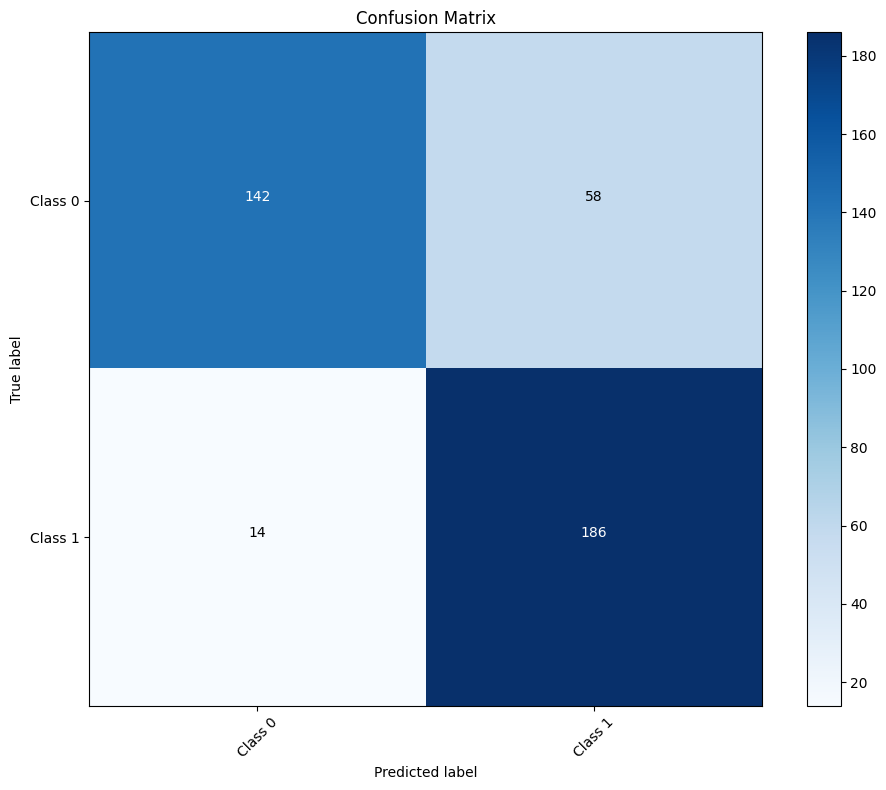


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.71      0.80       200
     Class 1       0.76      0.93      0.84       200

    accuracy                           0.82       400
   macro avg       0.84      0.82      0.82       400
weighted avg       0.84      0.82      0.82       400

{'loss': [0.6505040526390076, 0.54213947057724, 0.5021506547927856, 0.45973750948905945, 0.432546466588974, 0.4124104082584381, 0.4022182524204254, 0.38112887740135193, 0.36604273319244385, 0.3425300121307373, 0.32046979665756226, 0.3159937262535095, 0.30159875750541687, 0.2779621481895447, 0.26576587557792664, 0.25539615750312805, 0.2640213668346405, 0.22509711980819702, 0.23783621191978455, 0.2383202761411667, 0.21834692358970642, 0.20131468772888184, 0.18315666913986206, 0.15772172808647156, 0.16354422271251678, 0.13078758120536804, 0.13810929656028748, 0.1335221230983734, 0.1289195865392685, 0.13473553955554962, 0.12931279838085175, 0.12

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# 이미지 크기 및 배치 크기 설정
img_width, img_height = 224, 224
batch_size = 32

# 테스트 세트에 대한 평가
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Confusion Matrix 생성을 위한 예측
test_generator.reset()
y_pred = model.predict(test_generator, steps=np.ceil(test_generator.samples / batch_size))
y_pred = (y_pred > 0.5).astype(int).flatten()  # 이진 분류에서 임계값 0.5 적용

# 실제 레이블 가져오기
y_true = test_generator.classes

# 예측과 실제 레이블의 길이를 맞추기
y_pred = y_pred[:len(y_true)]

print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Confusion Matrix 계산
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')

# 각 셀에 숫자 표시
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

# 학습 결과 출력
print(history.history)

2024.7.28  work end

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GaussianNoise, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras import backend as K

# 사용자 정의 F1 Score 메트릭 정의
def f1_score(y_true, y_pred):
    precision = tf.keras.metrics.Precision()(y_true, y_pred)
    recall = tf.keras.metrics.Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# 폴더 경로 설정
train_set = '/content/drive/MyDrive/Colab Notebooks/MT_240721/train_new'
val_set = '/content/drive/MyDrive/Colab Notebooks/MT_240721/val'
test_set = '/content/drive/MyDrive/Colab Notebooks/MT_240721/test'

# 데이터 정규화
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# ... (rest of your code)

# 데이터 생성기 설정
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'  # Change to 'binary' for 2 classes
)

validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    class_mode='binary'  # Change to 'binary' for 2 classes
)

test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'  # Change to 'binary' for 2 classes
)


# 모델 정의
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# 모델 컴파일
optimizer = Adam(learning_rate=0.01)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)


# 모델 학습
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Found 15782 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 gaussian_noise_28 (Gaussia  (None, 7, 7, 1536)        0         
 nNoise)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dense_28 (Dense)            (None, 256)               393472


##Model evaluation

In [ ]:
model.evaluate(train_generator)

987/987 [==============================] - 108s 109ms/step - loss: 0.6941 - accuracy: 0.4831 - precision: 0.4700 - recall: 0.9013 - auc: 0.5386


[0.6941485404968262,
 0.48308199644088745,
 0.47003063559532166,
 0.9013257026672363,
 0.5386248826980591]

In [ ]:
model.evaluate(validation_generator)

25/25 [==============================] - 3s 137ms/step - loss: 0.6932 - accuracy: 0.4975 - precision: 0.4986 - recall: 0.8900 - auc: 0.5256


[0.6931976079940796,
 0.4975000023841858,
 0.49859943985939026,
 0.8899999856948853,
 0.5256375074386597]

In [ ]:
model.evaluate(test_generator)

25/25 [==============================] - 3s 133ms/step - loss: 0.6918 - accuracy: 0.4975 - precision: 0.4986 - recall: 0.9100 - auc: 0.5751


[0.6917821764945984,
 0.4975000023841858,
 0.4986301362514496,
 0.9100000262260437,
 0.5751124620437622]

**Performance Plots**

**Learning curve**

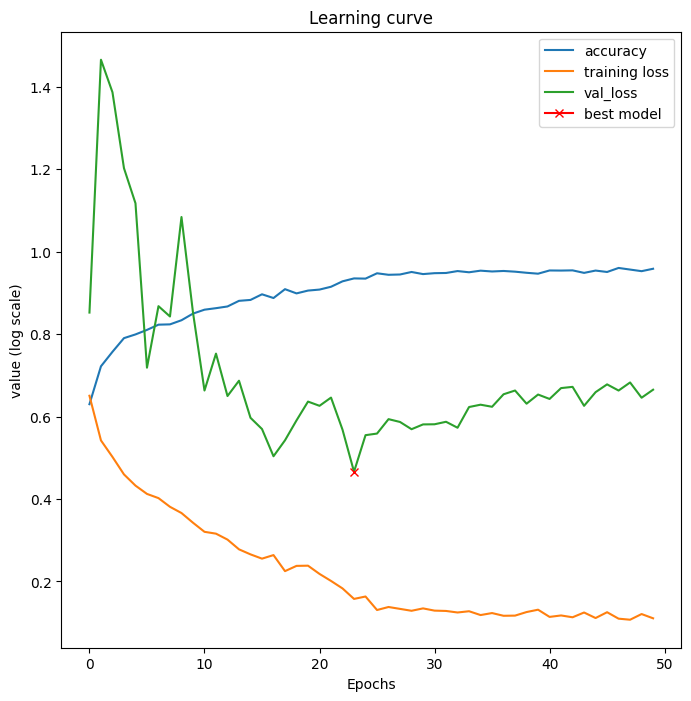

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

**Precision plot**

KeyError: 'precision'

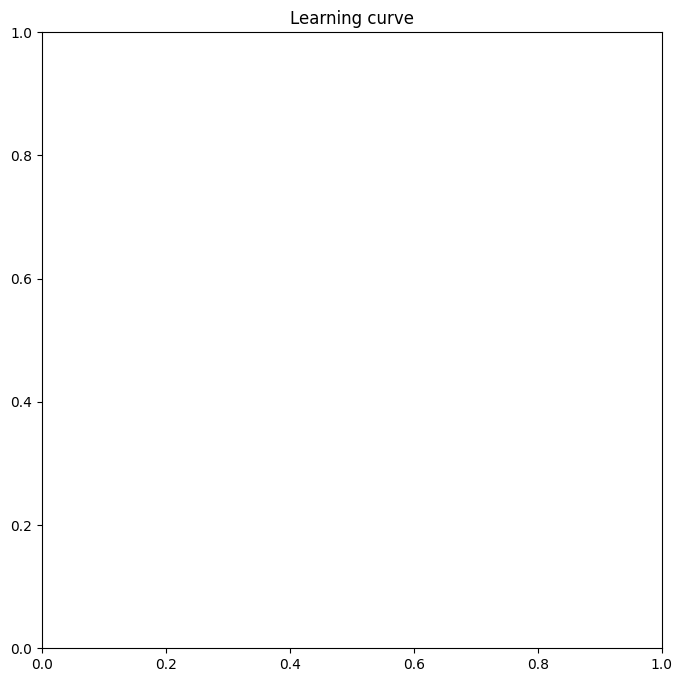

In [7]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

**Recall plot**

KeyError: 'precision'

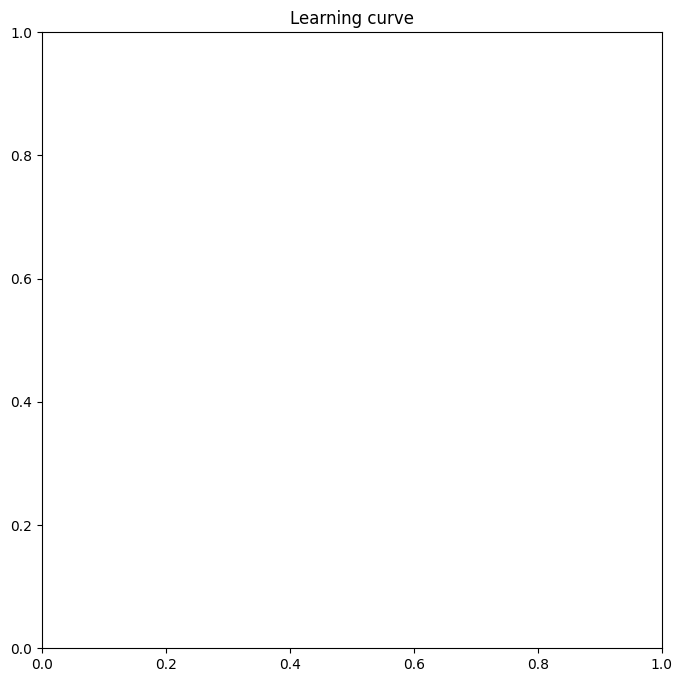

In [8]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

**AUC plot**

KeyError: 'precision'

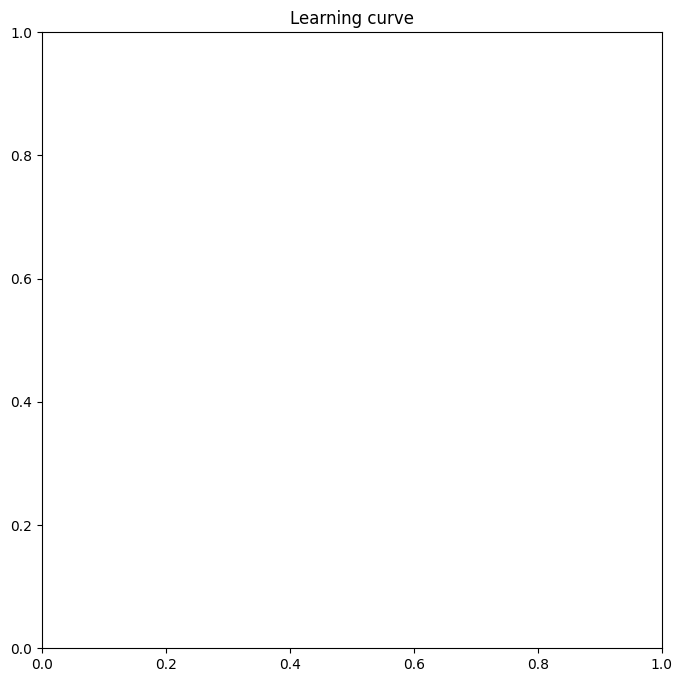

In [9]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

# Model prediction


In [ ]:
from keras.preprocessing import image
img = image.load_img('../input/curated-colon-dataset-for-deep-learning/test/0_normal/test_normal_ (1).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="malignancy"
elif a==1:
    op="Benign"


plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))


In [10]:
model.save('/content/drive/MyDrive/Colab Notebooks/MT_project/my_model240728.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/MT_project/my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.keras')